In [2]:
import numpy as np 
import glob 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st

# Confidence Interval 
This function computes the confidence interval of a given range of scores entered by a subject. 

In [3]:

def confidence_interval(scores,conf_perc = 0.95):
    nb_of_scores  = len(scores)
    mean , standard_error = np.mean(scores), st.sem(scores)
    width =  standard_error * st.t.ppf((1+conf_perc)/2,nb_of_scores-1)
    return  width
    

    

## Outlier detection 
This function detects outliers if there are any.

In [4]:
def findOutliers(scoresTable): # scoreTable columns: ratings of all subjects per stimuli
                               # scoreTable rows : ratings of all stimuli per subject   
    
    kurtosis = st.kurtosistest(scoresTable,1)[0]
    upper=np.zeros(scoresTable.shape[1])
    lower=np.zeros(scoresTable.shape[1])
    stdcoeff = np.zeros(kurtosis.shape)
    means = np.mean(scoresTable,1)
    for idx,elem in enumerate(kurtosis):
        if not(elem>2 and elem <4):
            stdcoeff[idx] = np.sqrt(20)
        else :
            stdcoeff[idx]=2
    for idx_stimuli, stimuli in enumerate(scoresTable): 
        for idx_subject, subject in enumerate(stimuli):
            if scoresTable[idx_stimuli][idx_subject] > np.mean(scoresTable[idx_stimuli])+stdcoeff[idx_stimuli]*np.std(scoresTable[idx_stimuli]):
                upper[idx_subject] += 1
            if scoresTable[idx_stimuli][idx_subject] < np.mean(scoresTable[idx_stimuli])-stdcoeff[idx_stimuli]*np.std(scoresTable[idx_stimuli]):
                lower[idx_subject] += 1
    outliers_1 = (upper + lower)/scoresTable.shape[0]>0.05  
    outliers_2 = np.abs((upper-lower)/(upper+lower))<0.3
    outliers = outliers_1*outliers_2
    return(outliers)
    
            
    

## File processing
This section processes the results_0i.txt files, where results_0i.txt contains the answers of a subject for an entire experiment

In [6]:
mos_std_amph = []
mos_std_loot = []
mos_std_long = []

mos_std_bipl = [] 

[]


IndexError: tuple index out of range

In [8]:
files_Amph=glob.glob("Amphoriskos/*.txt")
files_Loot=glob.glob("Loot/*.txt")
files_Long=glob.glob("Longdress/*.txt")
files_bipl=glob.glob("Biplane/*.txt")
files_Amph.sort()
files_Loot.sort()
files_Long.sort()
files_bipl.sort()

In [9]:
all_files = [files_Amph,files_Loot,files_Long,files_bipl]

In [10]:
all_files_flat = [elem  for item in all_files for elem in item ]

In [11]:
for elem in files_Amph: 
    r = open(elem,'r')
    values = r.readlines()
    a = "".join(values)
    b= a.split("\n")
    b = np.delete(b,9)
    b = list(map(lambda x : int(x),b))
    mos_std_amph.append((elem,np.mean(b),np.std(b),confidence_interval(b),b))
    print(b)
    r.close()
print("----")
for elem in files_Loot: 
    r = open(elem,'r')
    values = r.readlines()
    a = "".join(values)
    b= a.split("\n")
    b = np.delete(b,9)
    b = list(map(lambda x : int(x),b))
    mos_std_loot.append((elem,np.mean(b),np.std(b),confidence_interval(b),b))
    print(b)
    r.close()
print("----")   
for elem in files_Long: 
    r = open(elem,'r')
    values = r.readlines()
    a = "".join(values)
    b= a.split("\n")
    b = np.delete(b,9)
    b = list(map(lambda x : int(x),b))
    mos_std_long.append((elem,np.mean(b),np.std(b),confidence_interval(b),b))
    print(b)
    r.close()
print("----")
for elem in files_bipl: 
    r = open(elem,'r')
    values = r.readlines()
    a = "".join(values)
    b= a.split("\n")
    b = np.delete(b,9)
    b = list(map(lambda x : int(x),b))
    mos_std_bipl.append((elem,np.mean(b),np.std(b),confidence_interval(b),b))
    print(b)
    r.close() 

[6, 4, 3, 2, 3, 1, 1, 1, 6]
[7, 8, 7, 8, 7, 5, 5, 6, 7]
[9, 9, 7, 8, 9, 7, 7, 7, 9]
[9, 9, 7, 9, 9, 7, 9, 8, 9]
[9, 9, 9, 9, 9, 9, 9, 8, 9]
[1, 2, 1, 1, 3, 1, 1, 1, 1]
[5, 7, 5, 5, 5, 1, 3, 3, 5]
[8, 8, 7, 5, 7, 9, 7, 6, 8]
[7, 9, 9, 8, 9, 9, 9, 9, 9]
[9, 9, 9, 6, 9, 5, 9, 8, 9]
----
[1, 2, 2, 1, 1, 1, 1, 1, 1]
[3, 5, 3, 1, 3, 3, 1, 1, 2]
[6, 8, 7, 1, 7, 5, 3, 4, 8]
[8, 8, 8, 8, 9, 7, 5, 7, 8]
[9, 9, 9, 5, 9, 9, 9, 7, 9]
[1, 2, 1, 1, 1, 1, 1, 1, 1]
[1, 4, 3, 1, 1, 1, 1, 1, 1]
[3, 7, 5, 2, 5, 3, 3, 1, 5]
[7, 8, 7, 3, 7, 7, 3, 5, 8]
[8, 9, 8, 7, 9, 9, 7, 7, 9]
----
[1, 2, 1, 1, 1, 1, 1, 1, 1]
[2, 6, 3, 1, 5, 3, 1, 2, 3]
[6, 7, 6, 3, 7, 5, 1, 4, 7]
[7, 8, 8, 5, 9, 8, 5, 6, 8]
[9, 9, 8, 9, 9, 9, 7, 7, 9]
[1, 3, 1, 1, 1, 1, 1, 1, 1]
[2, 4, 3, 2, 3, 1, 1, 1, 1]
[3, 7, 5, 3, 3, 3, 1, 2, 5]
[5, 8, 6, 3, 7, 7, 3, 5, 8]
[7, 9, 9, 8, 9, 9, 7, 7, 8]
----
[2, 3, 1, 2, 1, 1, 1, 1, 2]
[4, 6, 3, 3, 3, 1, 3, 5, 5]
[7, 9, 7, 5, 7, 3, 5, 7, 7]
[9, 9, 8, 4, 9, 7, 9, 8, 8]
[9, 9, 8, 9, 9, 9, 9, 7, 9]
[2, 3

In [12]:
mos_amph = list(map(lambda x : x[1],mos_std_amph))
mos_amph_predlift=mos_amph[0:5]
mos_amph_raht= mos_amph[5:10]

mos_long = list(map(lambda x : x[1],mos_std_long))
mos_long_predlift=mos_long[0:5]
mos_long_raht= mos_long[5:10]

mos_loot = list(map(lambda x : x[1],mos_std_loot))
mos_loot_predlift=mos_loot[0:5]
mos_loot_raht= mos_loot[5:10]

mos_bipl = list(map(lambda x : x[1],mos_std_bipl))
mos_bipl_predlift=mos_bipl[0:5]
mos_bipl_raht= mos_bipl[5:10]


bitrates_predlift_amph= pd.read_csv("bitrates/octree-predlift/tmc13_apsipa_amphoriskos_vox10_RD_geom_text_octree-predlift.csv")['bpp'].tolist()
bitrates_predlift_amph=bitrates_predlift_amph[0:5]

bitrates_predlift_loot= pd.read_csv("bitrates/octree-predlift/tmc13_apsipa_loot_vox10_1200_RD_geom_text_octree-predlift.csv")['bpp'].tolist()
bitrates_predlift_loot=bitrates_predlift_loot[0:5]

bitrates_predlift_longdress= pd.read_csv("bitrates/octree-predlift/tmc13_apsipa_longdress_vox10_1300_RD_geom_text_octree-predlift.csv")['bpp'].tolist()
bitrates_predlift_longdress=bitrates_predlift_longdress[0:5]

bitrates_predlift_biplane= pd.read_csv("bitrates/octree-predlift/tmc13_apsipa_biplane_vox10_RD_geom_text_octree-predlift.csv")['bpp'].tolist()
bitrates_predlift_biplane=bitrates_predlift_biplane[0:5]

std_amph = list(map(lambda x : x[2],mos_std_amph))
std_amph_predlift=std_amph[0:5]
std_amph_raht= std_amph[5:10]

std_loot = list(map(lambda x : x[2],mos_std_amph))
std_loot_predlift=std_loot[0:5]
std_amph_raht= std_loot[5:10]

std_long = list(map(lambda x : x[2],mos_std_amph))
std_long_predlift=std_long[0:5]
std_long_raht= std_long[5:10]

std_bipl = list(map(lambda x : x[2],mos_std_amph))
std_bipl_predlift=std_bipl[0:5]
std_bipl_raht= std_bipl[5:10]

 
ci_amph = list(map(lambda x : x[3],mos_std_amph))
ci_amph_predlift=ci_amph[0:5]
ci_amph_raht= ci_amph[5:10]

ci_loot = list(map(lambda x : x[3],mos_std_amph))
ci_loot_predlift=ci_loot[0:5]
ci_loot_raht= ci_loot[5:10]

ci_long = list(map(lambda x : x[3],mos_std_amph))
ci_long_predlift=ci_long[0:5]
ci_long_raht= ci_long[5:10]

ci_bipl = list(map(lambda x : x[3],mos_std_amph))
ci_bipl_predlift=ci_bipl[0:5]
ci_bipl_raht= ci_bipl[5:10]

In [13]:
valueamph = [elem[4] for elem in mos_std_amph]
valuebipl = [elem[4] for elem in mos_std_bipl]
valuelong = [elem[4] for elem in mos_std_long]
valueloot = [elem[4] for elem in mos_std_loot]
values  = np.concatenate((valueamph,valuelong,valueloot,valuebipl))
print(values)
findOutliers(values)

[[6 4 3 2 3 1 1 1 6]
 [7 8 7 8 7 5 5 6 7]
 [9 9 7 8 9 7 7 7 9]
 [9 9 7 9 9 7 9 8 9]
 [9 9 9 9 9 9 9 8 9]
 [1 2 1 1 3 1 1 1 1]
 [5 7 5 5 5 1 3 3 5]
 [8 8 7 5 7 9 7 6 8]
 [7 9 9 8 9 9 9 9 9]
 [9 9 9 6 9 5 9 8 9]
 [1 2 1 1 1 1 1 1 1]
 [2 6 3 1 5 3 1 2 3]
 [6 7 6 3 7 5 1 4 7]
 [7 8 8 5 9 8 5 6 8]
 [9 9 8 9 9 9 7 7 9]
 [1 3 1 1 1 1 1 1 1]
 [2 4 3 2 3 1 1 1 1]
 [3 7 5 3 3 3 1 2 5]
 [5 8 6 3 7 7 3 5 8]
 [7 9 9 8 9 9 7 7 8]
 [1 2 2 1 1 1 1 1 1]
 [3 5 3 1 3 3 1 1 2]
 [6 8 7 1 7 5 3 4 8]
 [8 8 8 8 9 7 5 7 8]
 [9 9 9 5 9 9 9 7 9]
 [1 2 1 1 1 1 1 1 1]
 [1 4 3 1 1 1 1 1 1]
 [3 7 5 2 5 3 3 1 5]
 [7 8 7 3 7 7 3 5 8]
 [8 9 8 7 9 9 7 7 9]
 [2 3 1 2 1 1 1 1 2]
 [4 6 3 3 3 1 3 5 5]
 [7 9 7 5 7 3 5 7 7]
 [9 9 8 4 9 7 9 8 8]
 [9 9 8 9 9 9 9 7 9]
 [2 3 1 1 3 1 1 1 1]
 [6 4 3 5 5 1 3 3 7]
 [5 9 5 7 7 8 5 5 8]
 [9 9 9 8 9 8 7 7 9]
 [9 9 8 9 9 8 9 9 9]]


/home/toad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/home/toad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/toad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


array([False, False, False, False, False, False, False, False, False])

In [14]:
bitrates_raht_amph = pd.read_csv("bitrates/octree-raht/tmc13_apsipa_amphoriskos_vox10_RD_geom_text_octree-raht.csv")['bpp'].tolist()
bitrates_raht_amph=bitrates_raht_amph[0:5]

bitrates_raht_longdress = pd.read_csv("bitrates/octree-raht/tmc13_apsipa_longdress_vox10_1300_RD_geom_text_octree-raht.csv")['bpp'].tolist()
bitrates_raht_longdress=bitrates_raht_longdress[0:5]

bitrates_raht_loot = pd.read_csv("bitrates/octree-raht/tmc13_apsipa_loot_vox10_1200_RD_geom_text_octree-raht.csv")['bpp'].tolist()
bitrates_raht_loot=bitrates_raht_loot[0:5]


bitrates_raht_biplane = pd.read_csv("bitrates/octree-raht/tmc13_apsipa_biplane_vox10_RD_geom_text_octree-raht.csv")['bpp'].tolist()
bitrates_raht_biplane=bitrates_raht_biplane[0:5]

## Data plotting
Here, we plot the acquired, processed data

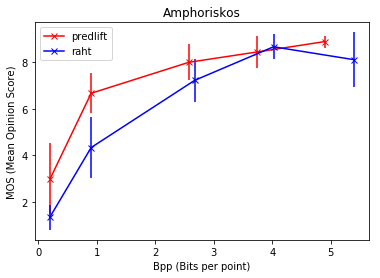

In [15]:
amph_plot = (plt.plot(bitrates_predlift_amph,mos_amph_predlift,"r",label = "predlift",marker='x'),plt.plot(bitrates_raht_amph,mos_amph_raht,"b",marker='x',label="raht"))
plt.legend(loc='upper left')
plt.title('Amphoriskos')
plt.xlabel("Bpp (Bits per point)")
plt.ylabel("MOS (Mean Opinion Score)")

plt.errorbar(bitrates_predlift_amph,mos_amph_predlift,yerr=ci_amph_predlift,color="r",fmt='none')
plt.errorbar(bitrates_raht_amph,mos_amph_raht,yerr=ci_amph_raht,color='b',fmt='none')

plt.savefig("Amph.png")

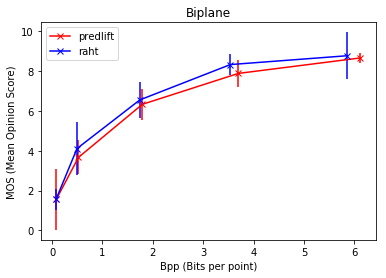

In [16]:
biplane_plot=(plt.plot(bitrates_predlift_biplane,mos_bipl_predlift,"r",label='predlift',marker='x'),plt.plot(bitrates_raht_biplane,mos_bipl_raht,"b",marker='x',label='raht'))
plt.legend(loc='upper left')
plt.title("Biplane")
plt.xlabel("Bpp (Bits per point)")
plt.ylabel("MOS (Mean Opinion Score)")
plt.errorbar(bitrates_predlift_biplane,mos_bipl_predlift,yerr=ci_bipl_predlift,color="r",fmt = 'none')
plt.errorbar(bitrates_raht_biplane,mos_bipl_raht,yerr=ci_bipl_raht,color='b',fmt='none')
plt.savefig("Bipl.png")

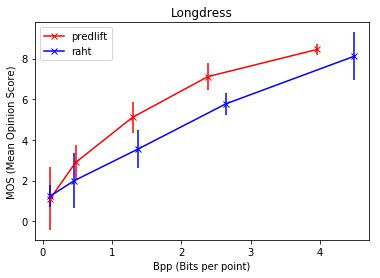

In [17]:
longdress_plot=(plt.plot(bitrates_predlift_longdress,mos_long_predlift,"r",label='predlift',marker='x'),plt.plot(bitrates_raht_longdress,mos_long_raht,"b",label='raht',marker='x'))
plt.legend(loc='upper left')
plt.title("Longdress")
plt.xlabel("Bpp (Bits per point)")
plt.ylabel("MOS (Mean Opinion Score)")
plt.errorbar(bitrates_predlift_longdress,mos_long_predlift,yerr=ci_long_predlift,color='r',fmt='none')
plt.errorbar(bitrates_raht_longdress,mos_long_raht,yerr=ci_long_raht,color='b',fmt='none')
plt.savefig("Long.png")

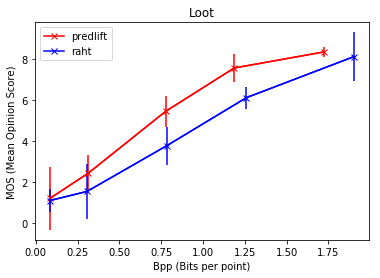

In [18]:
loot_plot= (plt.plot(bitrates_predlift_loot,mos_loot_predlift,"r",label='predlift',marker='x'),plt.plot(bitrates_raht_loot,mos_loot_raht,"b",label='raht',marker='x'))
plt.title("Loot")
plt.legend(loc='upper left')
plt.xlabel("Bpp (Bits per point)")
plt.ylabel("MOS (Mean Opinion Score)")
plt.errorbar(bitrates_predlift_loot,mos_loot_predlift,yerr=ci_loot_predlift,color ='r')
plt.errorbar(bitrates_raht_loot,mos_loot_raht,yerr=ci_loot_raht,color='b')
plt.savefig("Loot.png")